In [8]:
import torch

x = torch.zeros(2, 2, 2)
y = torch.empty(2, 2, 2)
x, y

(tensor([[[0., 0.],
          [0., 0.]],
 
         [[0., 0.],
          [0., 0.]]]),
 tensor([[[0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00]],
 
         [[2.3640e+14, 1.4013e-45],
          [0.0000e+00, 0.0000e+00]]]))

In [11]:
print(x.size())
x.shape

torch.Size([2, 2, 2])


torch.Size([2, 2, 2])

In [13]:
x = torch.tensor([1,3,5,7], dtype= torch.float64)
x

tensor([1., 3., 5., 7.], dtype=torch.float64)

In [18]:
x = torch.ones(2,2)
y = torch.ones(2,2)
print(x+y)
print(y)
y.add_(x)
print(y)

tensor([[2., 2.],
        [2., 2.]])
tensor([[1., 1.],
        [1., 1.]])
tensor([[2., 2.],
        [2., 2.]])


In [27]:
print(y.size())
print(y.view(4, -1).size())

torch.Size([2, 2])
torch.Size([4, 1])


In [34]:
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
x = torch.rand(2,2,2,2,)
x = x.to(device)
print(device)
print(x, x.device)

mps
tensor([[[[0.8533, 0.8358],
          [0.3470, 0.7557]],

         [[0.4772, 0.3056],
          [0.2351, 0.2489]]],


        [[[0.6525, 0.4228],
          [0.4391, 0.7473]],

         [[0.4700, 0.2101],
          [0.3870, 0.0651]]]], device='mps:0') mps:0


In [54]:
x = torch.ones(3, requires_grad=True)
y = x + 0
print(x)
print(y)
print(y.grad_fn)

tensor([1., 1., 1.], requires_grad=True)
tensor([1., 1., 1.], grad_fn=<AddBackward0>)


In [55]:
z = y * y * 3
print(z)
z = z.mean()
print(z)

tensor([3., 3., 3.], grad_fn=<MulBackward0>)
tensor(3., grad_fn=<MeanBackward0>)


In [56]:
print(x.grad)
z.backward()
print(x.grad)

None
tensor([2., 2., 2.])


Linear Regression

In [10]:
import torch
X = torch.arange(1,9, dtype=torch.float32)
Y = torch.arange(2,17,2, dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

def forward(x):
    return w * x

def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

X_test = 5.0

print(f"Pred bf training: f({X_test}) = {forward(X_test).item():.3f}")

Pred bf training: f(5.0) = 0.000


In [14]:
learning_rate = 0.01
n_epochs = 100
for epoch in range(n_epochs):
    y_pred = forward(X)
    
    l = loss(Y, y_pred)
    
    l.backward()
    
    with torch.no_grad():
        w -= learning_rate * w.grad
    
    w.grad.zero_()
    
    if (epoch+1) % 10 ==0:
        print(f'epoch {epoch+1}: w = {w.item():.3f}, loss={l.item():.3f}')

print(f"Pred after training: f({X_test}) = {forward(X_test).item():.3f}")


epoch 10: w = 2.000, loss=0.000
epoch 20: w = 2.000, loss=0.000
epoch 30: w = 2.000, loss=0.000
epoch 40: w = 2.000, loss=0.000
epoch 50: w = 2.000, loss=0.000
epoch 60: w = 2.000, loss=0.000
epoch 70: w = 2.000, loss=0.000
epoch 80: w = 2.000, loss=0.000
epoch 90: w = 2.000, loss=0.000
epoch 100: w = 2.000, loss=0.000
Pred after training: f(5.0) = 10.000


In [1]:
import torch
import torch.nn as nn

X = torch.arange(1, 9, dtype=torch.float32).view(-1, 1)
Y = torch.arange(2, 18, 2, dtype=torch.float32).view(-1, 1)

n_samples, n_features = X.shape

X_test = torch.tensor([5], dtype=torch.float32)

In [2]:
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim) -> None:
        super(LinearRegression, self).__init__()
        self.lin = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        return self.lin(x)

input_size, output_size = n_features, n_features

model = LinearRegression(input_size, output_size)

print(f'Prediction before training: f({X_test.item()}) = {model(X_test).item():.3f}\n')

learning_rate = 0.01
n_epochs = 100
loss_over_time =[]
w_over_time = []

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_epochs):
    
    y_predicted = model(X)
    
    l = loss(Y, y_predicted)
    
    l.backward()
    
    optimizer.step()
    
    optimizer.zero_grad()
    w, b = model.parameters()
    loss_over_time.append(l.item())
    w_over_time.append(w.item())
    
    if (epoch+1)%10 ==0:
        w, b= model.parameters()
        print(f'epoch:{epoch+1} , w = {w.item():.3f} , loss = {l.item():.3f}')

Prediction before training: f(5.0) = -2.507

epoch:10 , w = 1.760 , loss = 0.374
epoch:20 , w = 1.771 , loss = 0.345
epoch:30 , w = 1.780 , loss = 0.319
epoch:40 , w = 1.788 , loss = 0.294
epoch:50 , w = 1.797 , loss = 0.272
epoch:60 , w = 1.805 , loss = 0.251
epoch:70 , w = 1.812 , loss = 0.231
epoch:80 , w = 1.820 , loss = 0.214
epoch:90 , w = 1.827 , loss = 0.197
epoch:100 , w = 1.833 , loss = 0.182


In [3]:
print(f"Prediction after training: f({X_test.item()}) = {model(X_test).item():.3f}")

Prediction after training: f(5.0) = 10.104


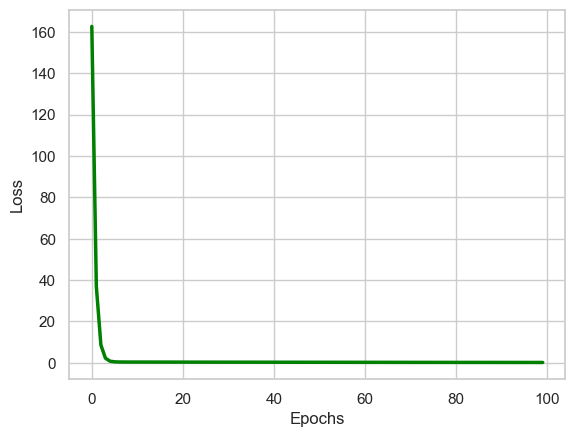

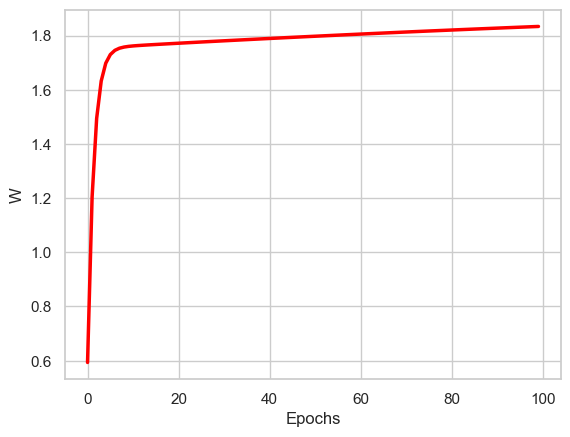

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

sns.lineplot(
    x=range(0, n_epochs),
    y=loss_over_time,
    color = "green",
    linewidth = 2.5
)
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()


sns.lineplot(
    x=range(0, n_epochs),
    y=w_over_time,
    color = "red",
    linewidth = 2.5
)
plt.ylabel("W")
plt.xlabel("Epochs")
plt.show()

Neural Network

In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

# Hyper parameters
input_size = 28 * 28
hidden_size = 500
num_clases = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

train_dataset = torchvision.datasets.MNIST(
    root="./data",
    train=True,
    transform=transforms.ToTensor(),
    download=True,
)

test_dataset = torchvision.datasets.MNIST(
    root="./data",
    train=False,
    transform=transforms.ToTensor(),
)

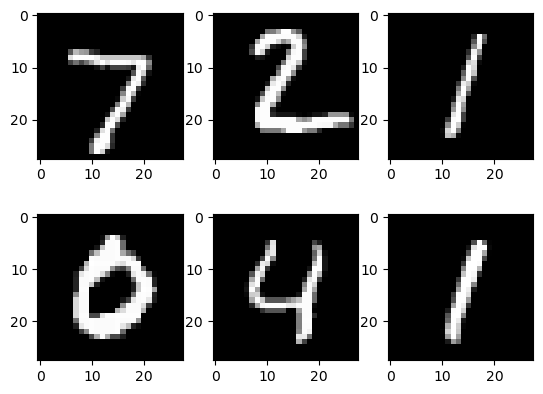

In [7]:
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset, batch_size=batch_size, shuffle=True
)
test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset, batch_size=batch_size, shuffle=False,
)
examples = iter(test_loader)
example_data, example_targets = next(examples)

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()

In [14]:
model = 0

In [15]:
class NN(nn.Module):
    def __init__(self, input_size, hidden_size, num_clases) -> None:
        super(NN, self).__init__()
        self.linear1 = nn.Linear(in_features=input_size, out_features=hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(in_features=hidden_size, out_features=num_clases)

    def forward(self, x):
        return self.linear2(self.relu(self.linear1(x)))


model = NN(input_size, hidden_size, num_clases).to(device)

optimizer = torch.optim.Adam(
    model.parameters(),
    lr=learning_rate
    # momentum=0.9,
)
criterion = nn.CrossEntropyLoss()

n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)

        output = model(images)
        loss = criterion(output, labels)
        
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        if (i+1) % 100 == 0:
            print(f"Epoch {epoch}/{num_epochs}, step {i+1}/{n_total_steps}, loss:{loss.item():.4f}")

Epoch 0/2, step 100/600, loss:0.2190
Epoch 0/2, step 200/600, loss:0.2562
Epoch 0/2, step 300/600, loss:0.2234
Epoch 0/2, step 400/600, loss:0.2483
Epoch 0/2, step 500/600, loss:0.2172
Epoch 0/2, step 600/600, loss:0.2168
Epoch 1/2, step 100/600, loss:0.0792
Epoch 1/2, step 200/600, loss:0.1324
Epoch 1/2, step 300/600, loss:0.0768
Epoch 1/2, step 400/600, loss:0.1456
Epoch 1/2, step 500/600, loss:0.1507
Epoch 1/2, step 600/600, loss:0.1442


In [23]:
with torch.no_grad():
    n_correct = 0
    n_samples = len(test_loader.dataset)
    
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        output = model(images)
        _, prediction = torch.max(output, 1)
        n_correct += (prediction == labels).sum().item()

acc = n_correct / n_samples
print(f"Acc. on {n_samples} images is {acc * 100}")

Acc. on 10000 images is 97.06


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

num_epochs = 10
batch_size = 32
learning_rate = 0.001

transforms = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

train_dataset = torchvision.datasets.CIFAR10(
    root="./data/", train=True, download=True, transform=transforms
)

test_dataset = torchvision.datasets.CIFAR10(
    root="./data/", train=False, download=True, transform=transforms
)

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True
)
test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=batch_size, shuffle=False
)

Files already downloaded and verified
Files already downloaded and verified


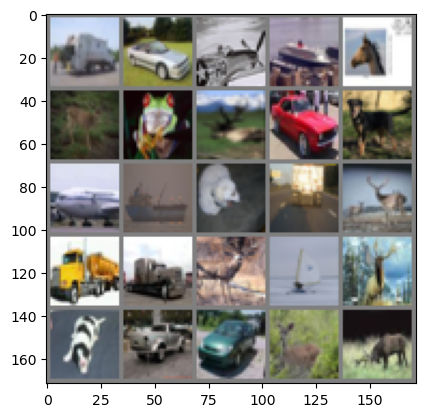

In [4]:
classes = train_dataset.classes

def imshow(imgs):
    imgs = imgs / 2 + 0.5
    npimgs = imgs.numpy()
    plt.imshow(np.transpose(npimgs, (1,2,0)))
    plt.show()
dataiter = iter(train_loader)
images, labels = next(dataiter)
img_grid = torchvision.utils.make_grid(images[:25], nrow=5)
imshow(img_grid)

In [5]:
class ConvNet(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.conv1 = nn.Conv2d(3,32,3)
        

4
